In [9]:
import os
import sys
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
import matplotlib.pyplot as plt

In [2]:
from psikit import Psikit

In [3]:
pk=Psikit(debug=True,threads=1,memory=12)


  Memory set to  11.176 GiB by Python driver.
  Threads set to 1 by Python driver.


In [4]:
pk.read_from_smiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')

In [5]:
pk.optimize()

Optimizer: Optimization complete!


-676.357117661661

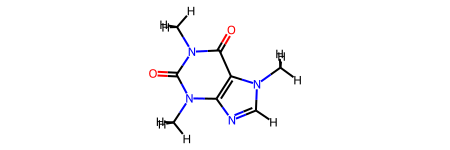

In [6]:
pk.mol

In [7]:
print(pk.calc_resp_charges())
print(pk.calc_mulliken_charges())
print(pk.calc_lowdin_charges())

[-0.20077687  0.07076475  0.08501915 -0.47143402  0.12600522 -0.1008149
  0.36323631 -0.49566852 -0.04585384  0.36242976 -0.5285323   0.02495502
  0.00600458 -0.03370618  0.11020501  0.11020501  0.11020501  0.17300445
  0.05006123  0.05006123  0.05006123  0.06152289  0.06152289  0.06152289]
[-0.11403645 -0.69387236  0.38638732 -0.6228276   0.63500424  0.09327011
  0.89980071 -0.63013989 -0.8790781   1.09567356 -0.62723517 -0.87748813
 -0.12041747 -0.12349403  0.12973209  0.16723261  0.16731183  0.18241192
  0.16749702  0.1489345   0.14892479  0.14560681  0.14561411  0.17518759]
[-0.13210154 -0.05231938  0.07733218 -0.27541585  0.13960086 -0.1255127
  0.29395709 -0.39449296 -0.18832769  0.34851698 -0.39857662 -0.15253215
 -0.13203403 -0.13824789  0.1040566   0.11674279  0.11779367  0.12134246
  0.1193197   0.10838866  0.1077186   0.10709081  0.10599238  0.12170803]


In [8]:
mol = pk.mol
atoms = mol.GetAtoms()

In [10]:
data = {'Symbol':[atom.GetSymbol() for atom in atoms],
        'RESP': [float(atom.GetProp('RESP')) for atom in atoms],
        'MULLIKEN': [float(atom.GetProp('MULLIKEN')) for atom in atoms],
       'LOWDIN':  [float(atom.GetProp('LOWDIN')) for atom in atoms]}

In [11]:
df = pd.DataFrame(data)

In [12]:
df.round(3)

,Symbol,RESP,MULLIKEN,LOWDIN
0,C,-0.201,-0.114,-0.132
1,N,0.071,-0.694,-0.052
2,C,0.085,0.386,0.077
3,N,-0.471,-0.623,-0.275
4,C,0.126,0.635,0.140
5,C,-0.101,0.093,-0.126
6,C,0.363,0.900,0.294
7,O,-0.496,-0.630,-0.394
8,N,-0.046,-0.879,-0.188
9,C,0.362,1.096,0.349


In [13]:
plt.style.use('ggplot')

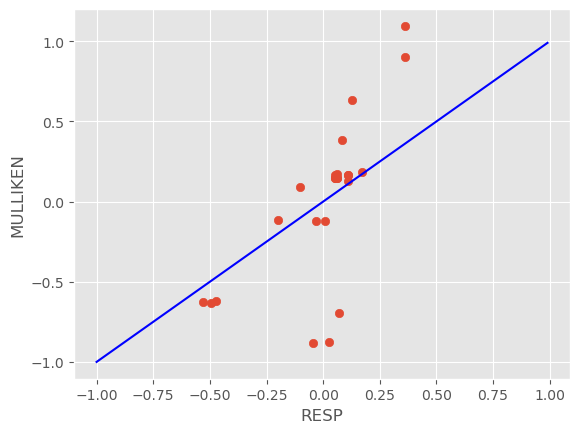

In [14]:
# RESP charge and MULLIKEN charge shows high correlation
plt.scatter(df.RESP, df.MULLIKEN)
plt.xlabel('RESP')
plt.ylabel('MULLIKEN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

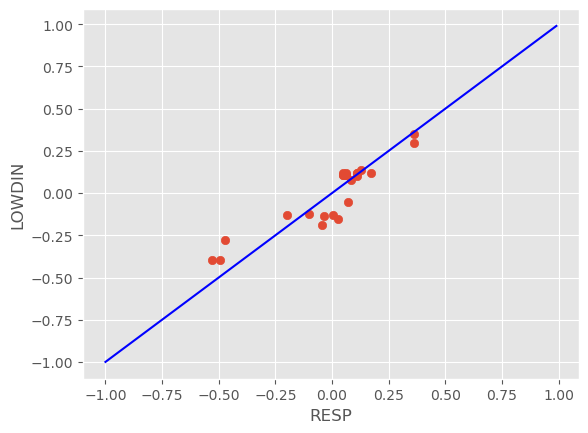

In [15]:
plt.scatter(df.RESP, df.LOWDIN)
plt.xlabel('RESP')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

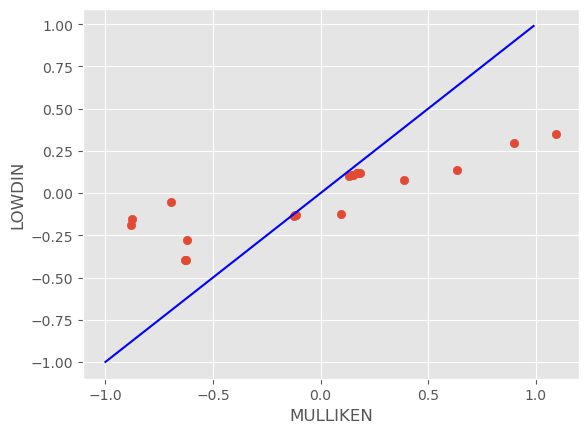

In [16]:
plt.scatter(df.MULLIKEN, df.LOWDIN)
plt.xlabel('MULLIKEN')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')